In [3]:
import pandas as pd
import re, os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

df = pd.read_csv("~/Desktop/CompAnalysis/FinalProject/oneHotDfAllCols.csv")


In [4]:
print(type(df))
print(df)

print(df.columns)

<class 'pandas.core.frame.DataFrame'>
         Unnamed: 0  SEX  RPTYEAR  STATE  EDUCATION  ADMTYPE  OFFGENERAL  \
0                 0    1     1991      1          3        1           1   
1                 1    1     1991      1          2        1           1   
2                 3    1     1991      1          2        1           2   
3                 5    2     1991      1          1        1           3   
4                 6    1     1991      1          1        1           2   
...             ...  ...      ...    ...        ...      ...         ...   
7191466    17075799    1     2020     56          3        1           1   
7191467    17075800    1     2020     56          2        1           3   
7191468    17075801    1     2020     56          1        1           1   
7191469    17075802    1     2020     56          1        1           2   
7191470    17075803    1     2020     56          1        1           1   

         ADMITYR  SENTLGTH  OFFDETAIL  ...  motor

In [167]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

us_states = gpd.read_file('~/Desktop/CompAnalysis/FinalProject/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')

#us_states = gpd.read_file('~/Desktop/CompAnalysis/FinalProject/cb_2018_us_state_5m/cb_2018_us_state_5m.shp')

us_statesSortedGEOID = us_states.sort_values('GEOID')

In [168]:
#type(us_states)
#print(us_states.geometry.geom_type.value_counts())
#print(us_states.head())
#print(us_states['GEOID'])
#us_statesSortedGEOID = us_states.sort_values('GEOID')

#Get rid of the states we don't want

""" #get rid of DE
us_statesSortedGEOID = us_statesSortedGEOID.drop(2,axis=0)
#get rid of ID
us_statesSortedGEOID = us_statesSortedGEOID.drop(23,axis=0)
#get rid of MD
us_statesSortedGEOID = us_statesSortedGEOID.drop(0,axis=0)
#get rid of NJ
us_statesSortedGEOID = us_statesSortedGEOID.drop(35,axis=0)
#get rid of NM
us_statesSortedGEOID = us_statesSortedGEOID.drop(10,axis=0)
#get rid of OR
us_statesSortedGEOID = us_statesSortedGEOID.drop(16,axis=0)
#get rid of VT
us_statesSortedGEOID = us_statesSortedGEOID.drop(33,axis=0) """
#get ride of PR
us_statesSortedGEOID = us_statesSortedGEOID.drop(7,axis=0)

#get rid oh AK
us_statesSortedGEOID = us_statesSortedGEOID.drop(25,axis=0)



# #for 5m
# #get ride of AS
# us_statesSortedGEOID = us_statesSortedGEOID.drop(49,axis=0)

# #get ride of GU
# us_statesSortedGEOID = us_statesSortedGEOID.drop(47,axis=0)

# #get ride of MP
# us_statesSortedGEOID = us_statesSortedGEOID.drop(48,axis=0)
# #get ride of PR
# us_statesSortedGEOID = us_statesSortedGEOID.drop(51,axis=0)
# #get ride of VI
# us_statesSortedGEOID = us_statesSortedGEOID.drop(39,axis=0)




#print(us_statesSortedSTUSPS.head())

print(us_statesSortedGEOID)
#us_states['buffered_geom'] = us_states.buffer(100)
#us_states.plot()
plt.show()

   STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
8       01  01779775  0400000US01    01     AL               Alabama   00   
50      04  01779777  0400000US04    04     AZ               Arizona   00   
9       05  00068085  0400000US05    05     AR              Arkansas   00   
12      06  01779778  0400000US06    06     CA            California   00   
42      08  01779779  0400000US08    08     CO              Colorado   00   
34      09  01779780  0400000US09    09     CT           Connecticut   00   
2       10  01779781  0400000US10    10     DE              Delaware   00   
36      11  01702382  0400000US11    11     DC  District of Columbia   00   
24      12  00294478  0400000US12    12     FL               Florida   00   
14      13  01705317  0400000US13    13     GA               Georgia   00   
48      15  01779782  0400000US15    15     HI                Hawaii   00   
23      16  01779783  0400000US16    16     ID                 Idaho   00   

In [164]:
from shapely.affinity import scale

# assume 'state_name' is the name of the state you want to modify
state = us_statesSortedGEOID[us_statesSortedGEOID['STUSPS'] == 'AK'].iloc[0]
scaled_geom = scale(state.geometry, xfact=0.5, yfact=0.5, origin='center')
us_statesSortedGEOID.loc[state.name, 'geometry'] = scaled_geom

In [19]:
#make data for just drugs 
#missing data for some states and need to get rid of DC
#missing for DE(10), ID(16), Maryland(24), NJ(34), NM (35), OR (41), VT(50)
stateDrugs = {}

for index, row in df.iterrows():
     if row['drugs'] == 1:
          if row['STATE'] in stateDrugs:
               stateDrugs[row['STATE']].append(row['SENTLGTH'])
               #print()
          else:
               stateDrugs[row['STATE']] = [row['SENTLGTH']]  


print(stateDrugs)






{1: [0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 0, 4, 4, 4, 4, 4, 2, 4, 0, 2, 4, 5, 2, 0, 4, 5, 2, 2, 0, 4, 0, 0, 1, 3, 3, 2, 4, 4, 3, 4, 2, 0, 4, 2, 2, 4, 4, 2, 4, 3, 4, 3, 4, 4, 4, 2, 4, 4, 0, 4, 4, 2, 4, 4, 2, 3, 2, 4, 4, 3, 3, 2, 4, 3, 4, 3, 3, 2, 4, 2, 4, 1, 1, 4, 0, 0, 4, 3, 4, 1, 4, 2, 5, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4, 4, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 4, 3, 2, 2, 3, 4, 4, 4, 3, 3, 2, 2, 2, 4, 4, 3, 2, 4, 4, 3, 2, 3, 3, 4, 2, 3, 2, 2, 2, 3, 3, 4, 4, 3, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 3, 2, 3, 2, 2, 4, 4, 4, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 3, 4, 2, 1, 0, 3, 5, 4, 2, 4, 4, 4, 4, 4, 4, 2, 3, 1, 2, 2, 4, 2, 4, 2, 3, 4, 4, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 1, 3, 3, 4, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 0, 4, 3, 3, 2, 3, 3, 3, 3, 0, 2, 2, 2, 3, 2, 3, 2, 4, 2, 3, 4, 3, 3, 2, 4, 3, 3, 2, 3, 4, 3, 1, 3, 3, 3, 4, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 0,

In [20]:
value = stateDrugs[1]
print(value)
print(type(value))
print(sum(value)/len(value))
most_common_number = max(set(value), key = value.count)
print(most_common_number)

[0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 0, 4, 4, 4, 4, 4, 2, 4, 0, 2, 4, 5, 2, 0, 4, 5, 2, 2, 0, 4, 0, 0, 1, 3, 3, 2, 4, 4, 3, 4, 2, 0, 4, 2, 2, 4, 4, 2, 4, 3, 4, 3, 4, 4, 4, 2, 4, 4, 0, 4, 4, 2, 4, 4, 2, 3, 2, 4, 4, 3, 3, 2, 4, 3, 4, 3, 3, 2, 4, 2, 4, 1, 1, 4, 0, 0, 4, 3, 4, 1, 4, 2, 5, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4, 4, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 4, 3, 2, 2, 3, 4, 4, 4, 3, 3, 2, 2, 2, 4, 4, 3, 2, 4, 4, 3, 2, 3, 3, 4, 2, 3, 2, 2, 2, 3, 3, 4, 4, 3, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 3, 2, 3, 2, 2, 4, 4, 4, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 3, 4, 2, 1, 0, 3, 5, 4, 2, 4, 4, 4, 4, 4, 4, 2, 3, 1, 2, 2, 4, 2, 4, 2, 3, 4, 4, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 1, 3, 3, 4, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 0, 4, 3, 3, 2, 3, 3, 3, 3, 0, 2, 2, 2, 3, 2, 3, 2, 4, 2, 3, 4, 3, 3, 2, 4, 3, 3, 2, 3, 4, 3, 1, 3, 3, 3, 4, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 0, 4, 

In [133]:
stateDrugsFinal = {10: 0 , 16: 0, 24: 0, 34:0, 35: 0, 41: 0, 50:0}
for state in stateDrugs.keys():
   valueList = stateDrugs[state]
   average =  sum(valueList)/len(valueList)
   roundedAverage = np.round(average, decimals=0)
   stateDrugsFinal[state] = roundedAverage

dfStateDrugs = pd.DataFrame(stateDrugsFinal.items(), columns=['GEOID', 'sentenceLen'])

dfStateDrugs['GEOID'] = dfStateDrugs['GEOID'].astype('object')
dfStateDrugs['sentenceLen'] = dfStateDrugs['sentenceLen'].astype(int)

dfStateDrugsSorted = dfStateDrugs.sort_values('GEOID')

#print(dfStateDrugsSorted)

sentenceLenList = []

for index, row in dfStateDrugsSorted.iterrows():
   sentenceLenList.append(row['sentenceLen'])

print(dfStateDrugsSorted)
print(sentenceLenList)
print(len(sentenceLenList))


   GEOID  sentenceLen
7      1            2
38     2            3
40     4            1
8      5            3
50     6            2
9      8            2
46     9            2
0     10            0
10    11            1
32    12            2
11    13            3
37    15            2
1     16            0
30    17            2
43    18            2
12    19            4
47    20            1
35    21            3
48    22            2
33    23            1
2     24            0
31    25            3
13    26            4
14    27            2
15    28            3
16    29            3
49    30            3
17    31            2
18    32            2
19    33            2
3     34            0
4     35            0
36    36            3
20    37            1
21    38            2
22    39            4
42    40            3
5     41            0
41    42            3
44    44            1
23    45            2
24    46            2
39    47            3
34    48            2
25    49  

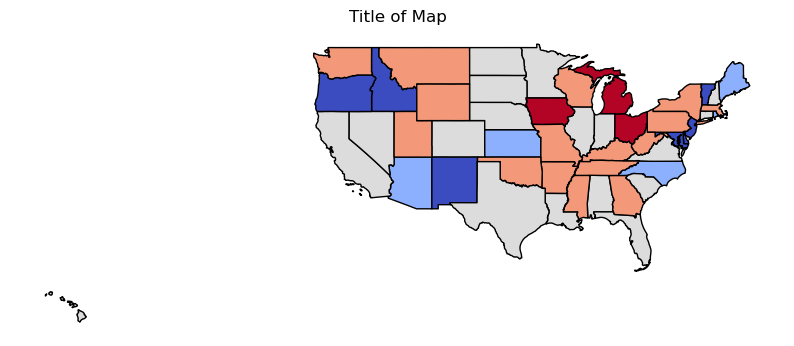

In [169]:
us_statesSortedGEOID['sentenceLen'] = sentenceLenList [:1] + sentenceLenList[2:]

fig, ax = plt.subplots(figsize=(10,10))
us_statesSortedGEOID.plot(ax=ax, column='sentenceLen', cmap='coolwarm', edgecolor='black')#, legend=True)
ax.set_title('Title of Map')
ax.set_axis_off()

# make the map bigger
fig = ax.get_figure()
fig.set_size_inches(10, 10)

# # make the legend smaller 
# leg = ax.get_legend()
# print(type(leg))
# leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))

plt.show()
